Disusun Oleh:
1.	Sugeng Dwi Cahyono (23/531008/PPA/06757)
2.	Muhammad Akbar Hamid (23/530003/PPA/06706)

# Import Library

In [1]:
!pip install Sastrawi
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [2]:
import gdown
import pandas as pd
import numpy as np
import time
import nltk
import gensim.downloader as api
import matplotlib.pyplot as plt

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Load Dataset

In [4]:
url = "https://drive.google.com/uc?id=13UUj240WKjosQnLfnveMcOutd0OYxBDF"
output = "News.csv"
gdown.download(url, output, quiet=False)

df_news = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=13UUj240WKjosQnLfnveMcOutd0OYxBDF
To: /content/News.csv
100%|██████████| 43.8M/43.8M [00:00<00:00, 88.9MB/s]


# Data Exploration

In [5]:
df_news.head()

,id,id_author,title,portal,time,author,editor,content,source
0,0,1,Infografis Pekerja Asing Dilarang Masuk Wilaya...,Liputan6.com,"24 Jul 2021, 09:02 WIB",Abdillah,Abdillah,Pemerintah melalui Menteri Hukum dan Hak Asasi...,https://www.liputan6.com/news/read/4614451/inf...
1,1,1,Infografis Jadwal Bulu Tangkis Indonesia di Ol...,Liputan6.com,"23 Jul 2021, 23:23 WIB",Abdillah,Abdillah,Bulu Tangkis menjadi andalan Indonesia berburu...,https://www.liputan6.com/bola/read/4614427/inf...
2,2,1,"Infografis Jangan Bebal, Kamu Tidak Kebal Covi...",Liputan6.com,"23 Jul 2021, 10:40 WIB",Abdillah,Abdillah,Covid-19 tidak mengenal usia dan status. Siapa...,https://www.liputan6.com/news/read/4613233/inf...
3,3,1,Infografis Awas Perokok Lebih Rentan Tertular ...,Liputan6.com,"22 Jul 2021, 10:35 WIB",Abdillah,Abdillah,Kebiasaan merokok berisiko menimbulkan sejumla...,https://www.liputan6.com/news/read/4612324/inf...
4,4,1,Infografis Perbedaan Aturan PPKM Level 3 dan 4,Liputan6.com,"22 Jul 2021, 09:01 WIB",Abdillah,Abdillah,Pemberlakuan Pembatasan Kegiatan Masyarakat at...,https://www.liputan6.com/news/read/4612511/inf...


In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         14343 non-null  int64 
 1   id_author  14343 non-null  int64 
 2   title      14343 non-null  object
 3   portal     14343 non-null  object
 4   time       14343 non-null  object
 5   author     14343 non-null  object
 6   editor     14343 non-null  object
 7   content    14334 non-null  object
 8   source     14193 non-null  object
dtypes: int64(2), object(7)
memory usage: 1008.6+ KB


In [7]:
df_news.describe(include='all')

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: FutureWarning: Parsed string "13 Jul 2021, 09:00 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,id_author,title,portal,time,author,editor,content,source
count,14343.000000,14343.000000,14343,14343,14343,14343,14343,14334,14193
unique,NaN,NaN,14216,2,12966,89,53,14211,14071
top,NaN,NaN,Pasutri di Makassar Kedapatan Curi HP Pengunju...,Merdeka.com,"13 Jul 2021, 09:00 WIB",Ihwan Fajar,-,Seorang Ibu Rumah Tangga (IRT) di Kota Makas...,https://www.merdeka.com/peristiwa/saksi-ungkap...
freq,NaN,NaN,2,9525,7,312,9525,2,2
mean,7171.929582,55.572474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4140.725179,23.100163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3586.500000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7172.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10757.500000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_news.isnull().sum()

,0
id,0
id_author,0
title,0
portal,0
time,0
author,0
editor,0
content,9
source,150


In [9]:
df_news['content'].head()

,content
0,Pemerintah melalui Menteri Hukum dan Hak Asasi...
1,Bulu Tangkis menjadi andalan Indonesia berburu...
2,Covid-19 tidak mengenal usia dan status. Siapa...
3,Kebiasaan merokok berisiko menimbulkan sejumla...
4,Pemberlakuan Pembatasan Kegiatan Masyarakat at...


# Pre-Processing

## Missing Data Handling

Terdapat data yang bernilai null pada kolom `content` dan `source` dari hasil Data Exploration sebelumnya, dengan jumlah sebagai berikut:
- Kolom `content` memiliki 9 nilai null
- Kolom `source` memiliki 150 nilai null

Nilai null akan dilakukan penangan agar menjaga kualitas dari data. Untuk penangannya adalah sebagai berikut:
- Kolom `content` yang memiliki nilai null akan dilakukan drop baris karena merupakan fokus utama dalam analisis teks
- Kolom `source` yang memiliki nilai null akan dilakukan imputasi dengan nilai default `Unknown`

In [10]:
df_news = df_news.dropna(subset=['content'])

In [11]:
df_news['source'] = df_news['source'].fillna('Unknown')

In [12]:
df_news.isnull().sum()

,0
id,0
id_author,0
title,0
portal,0
time,0
author,0
editor,0
content,0
source,0


## Tokenization

In [13]:
def tokenize_text(text):
    return word_tokenize(text)

In [14]:
df_news['tokens'] = df_news['content'].apply(tokenize_text)

In [15]:
df_news[['content', 'tokens']].head()

,content,tokens
0,Pemerintah melalui Menteri Hukum dan Hak Asasi...,"[Pemerintah, melalui, Menteri, Hukum, dan, Hak..."
1,Bulu Tangkis menjadi andalan Indonesia berburu...,"[Bulu, Tangkis, menjadi, andalan, Indonesia, b..."
2,Covid-19 tidak mengenal usia dan status. Siapa...,"[Covid-19, tidak, mengenal, usia, dan, status,..."
3,Kebiasaan merokok berisiko menimbulkan sejumla...,"[Kebiasaan, merokok, berisiko, menimbulkan, se..."
4,Pemberlakuan Pembatasan Kegiatan Masyarakat at...,"[Pemberlakuan, Pembatasan, Kegiatan, Masyaraka..."


# Query

In [40]:
queries = [
    "Teknologi kecerdasan buatan dalam transformasi digital",
    "Peningkatan kualitas pendidikan melalui platform online",
    "Dampak ekonomi global terhadap pertumbuhan industri lokal",
    "Strategi pengembangan olahraga seperti bulu tangkis dan sepak bola",
    "Perkembangan teknologi kesehatan untuk penanganan pandemi"
]

# Ranked Retrieval Models

## Term Frequency (TF)

In [28]:
start_time = time.time()

# Representasi Model TF
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(df_news['content'])

# Perhitungan Waktu Komputasi dengan Kueri
for query in queries:
    query_tokens = ' '.join(word_tokenize(query))
    query_vector = tf_vectorizer.transform([query_tokens])
    tf_matrix.dot(query_vector.T).toarray()

end_time = time.time()
tf_time = end_time - start_time

del start_time, end_time

## Term Frequency-Inverse Document Frequency (TF-IDF)

In [25]:
start_time = time.time()

# Representasi Model TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_news['content'])

# Perhitungan Waktu Komputasi dengan Kueri
for query in queries:
    query_tokens = ' '.join(word_tokenize(query))
    query_vector = tfidf_vectorizer.transform([query_tokens])
    tfidf_matrix.dot(query_vector.T).toarray()

end_time = time.time()
tfidf_time = end_time - start_time

del start_time, end_time

## Word2Vec

In [20]:
# Pretrained Model
word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [21]:
# Menghitung rata-rata vektor embedding
def average_vector(tokens, model):
    vectors = [model[word] for word in tokens if word in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [22]:
start_time = time.time()

# Representasi Model TF-IDF
df_news['word2vec_vectors'] = df_news['tokens'].apply(lambda tokens: average_vector(tokens, word2vec_model))

# Perhitungan Waktu Komputasi dengan Kueri
query_vectors = [average_vector(word_tokenize(query), word2vec_model) for query in queries]
for query_vec in query_vectors:
    cosine_similarities = cosine_similarity(np.vstack(df_news['word2vec_vectors']), [query_vec])

end_time = time.time()
word2vec_time = end_time - start_time

del start_time, end_time

# Evaluations

## Computation Time

Evaluasi waktu komputasi dilakukan untuk mengukur efisiensi waktu yang dibutuhkan oleh setiap model dalam memproses lima kueri berbeda. Tiga model yang dibandingkan adalah TF, TF-IDF, dan Word2Vec.

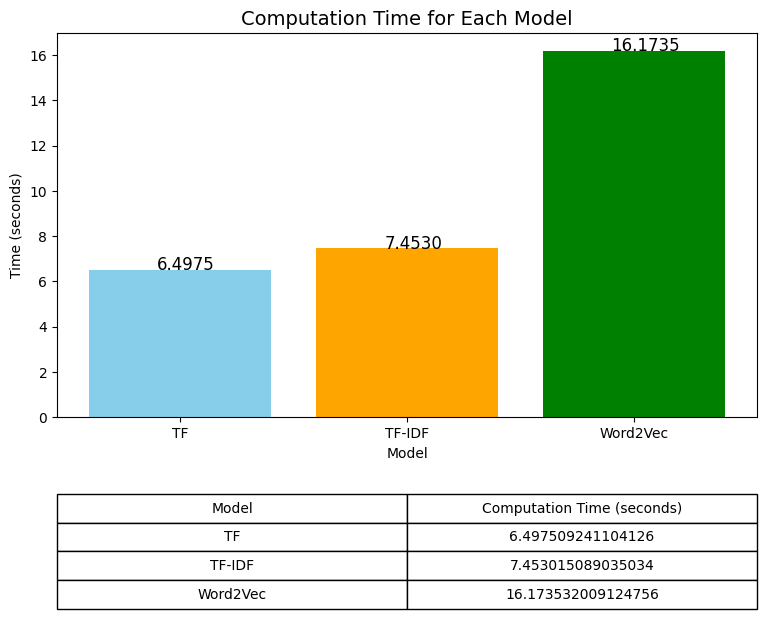

In [29]:
computation_times = {
    "TF": tf_time,
    "TF-IDF": tfidf_time,
    "Word2Vec": word2vec_time
}

computation_time_df = pd.DataFrame({
    "Model": list(computation_times.keys()),
    "Computation Time (seconds)": list(computation_times.values())
})

plt.figure(figsize=(10, 8))
bars = plt.bar(computation_time_df["Model"], computation_time_df["Computation Time (seconds)"], color=['skyblue', 'orange', 'green'])

for bar, time in zip(bars, computation_time_df["Computation Time (seconds)"]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f"{time:.4f}", fontsize=12)

table_data = computation_time_df.values
col_labels = computation_time_df.columns

plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='bottom', bbox=[0.0, -0.5, 1.0, 0.3])

plt.title("Computation Time for Each Model", fontsize=14)
plt.ylabel("Time (seconds)")
plt.xlabel("Model")
plt.subplots_adjust(left=0.2, bottom=0.4)

plt.show()


## The Retrieved Documents (Relevance to Query)

Evaluasi relevansi dokumen dilakukan untuk mengukur seberapa baik dokumen yang diretriev oleh model (TF, TF-IDF, Word2Vec) sesuai dengan kueri. Model TF dan TF-IDF menghitung relevansi berdasarkan frekuensi term dan bobot term, sementara Word2Vec menggunakan embedding untuk memahami hubungan semantik.

In [30]:
results_tf = {}
results_tfidf = {}
results_word2vec = {}

for query in queries:
    query_tokens = ' '.join(word_tokenize(query))
    query_vector = tf_vectorizer.transform([query_tokens])
    relevance_scores = tf_matrix.dot(query_vector.T).toarray()
    top_indices = relevance_scores.flatten().argsort()[::-1][:10]
    results_tf[query] = [df_news['content'].iloc[idx] for idx in top_indices]

for query in queries:
    query_tokens = ' '.join(word_tokenize(query))
    query_vector = tfidf_vectorizer.transform([query_tokens])
    relevance_scores = tfidf_matrix.dot(query_vector.T).toarray()
    top_indices = relevance_scores.flatten().argsort()[::-1][:10]
    results_tfidf[query] = [df_news['content'].iloc[idx] for idx in top_indices]

for query, query_vec in zip(queries, query_vectors):
    cosine_similarities = cosine_similarity(np.vstack(df_news['word2vec_vectors']), [query_vec])
    top_indices = cosine_similarities.flatten().argsort()[::-1][:10]
    results_word2vec[query] = [df_news['content'].iloc[idx] for idx in top_indices]

In [31]:
def calculate_similarity(query, results):

  vectorizer = TfidfVectorizer()
  all_texts = [query] + results
  tfidf_matrix = vectorizer.fit_transform(all_texts)
  query_vector = tfidf_matrix[0]
  result_vectors = tfidf_matrix[1:]
  similarities = cosine_similarity(query_vector, result_vectors).flatten()
  return similarities

similarity_results = {}
for query in queries:
    similarity_results[query] = {}
    similarity_results[query]['TF'] = calculate_similarity(query, results_tf[query])
    similarity_results[query]['TF-IDF'] = calculate_similarity(query, results_tfidf[query])
    similarity_results[query]['Word2Vec'] = calculate_similarity(query, results_word2vec[query])

similarity_df = pd.DataFrame.from_dict({(i,j): similarity_results[i][j]
                           for i in similarity_results.keys()
                           for j in similarity_results[i].keys()},
                       orient='index')

similarity_df.index = pd.MultiIndex.from_tuples(similarity_df.index, names=['Query', 'Model'])

similarity_df

0  \
Query                                              Model                
Teknologi kecerdasan buatan dalam transformasi ... TF        0.172428   
                                                   TF-IDF    0.285341   
                                                   Word2Vec  0.189233   
Peningkatan kualitas pendidikan melalui platfor... TF        0.097177   
                                                   TF-IDF    0.126632   
                                                   Word2Vec  0.013012   
Dampak ekonomi global terhadap pertumbuhan indu... TF        0.069401   
                                                   TF-IDF    0.099714   
                                                   Word2Vec  0.038302   
Strategi pengembangan olahraga seperti bulu tan... TF        0.060613   
                                                   TF-IDF    0.133396   
                                                   Word2Vec  0.022430   
Perkembangan teknologi kesehatan untuk penangan... TF        0.292145   
                                                   TF-IDF    0.231521   
                                                   Word2Vec  0.051514   

                                                                    1  \
Query                                              Model                
Teknologi kecerdasan buatan dalam transformasi ... TF        0.304601   
                                                   TF-IDF    0.235170   
                                                   Word2Vec  0.093317   
Peningkatan kualitas pendidikan melalui platfor... TF        0.100898   
                                                   TF-IDF    0.108830   
                                                   Word2Vec  0.149273   
Dampak ekonomi global terhadap pertumbuhan indu... TF        0.111443   
                                                   TF-IDF    0.151814   
                                                   Word2Vec  0.024845   
Strategi pengembangan olahraga seperti bulu tan... TF        0.039800   
                                                   TF-IDF    0.097262   
                                                   Word2Vec  0.052738   
Perkembangan teknologi kesehatan untuk penangan... TF        0.068329   
                                                   TF-IDF    0.128270   
                                                   Word2Vec  0.021081   

                                                                    2  \
Query                                              Model                
Teknologi kecerdasan buatan dalam transformasi ... TF        0.298114   
                                                   TF-IDF    0.182273   
                                                   Word2Vec  0.163955   
Peningkatan kualitas pendidikan melalui platfor... TF        0.066514   
                                                   TF-IDF    0.107632   
                                                   Word2Vec  0.029051   
Dampak ekonomi global terhadap pertumbuhan indu... TF        0.037130   
                                                   TF-IDF    0.204087   
                                                   Word2Vec  0.049920   
Strategi pengembangan olahraga seperti bulu tan... TF        0.038534   
                                                   TF-IDF    0.105150   
                                                   Word2Vec  0.056433   
Perkembangan teknologi kesehatan untuk penangan... TF        0.106588   
                                                   TF-IDF    0.108164   
                                                   Word2Vec  0.045295   

                                                                    3  \
Query                                              Model                
Teknologi kecerdasan buatan dalam transformasi ... TF        0.184675   
                                                   TF-IDF    0.148214   
                                                  

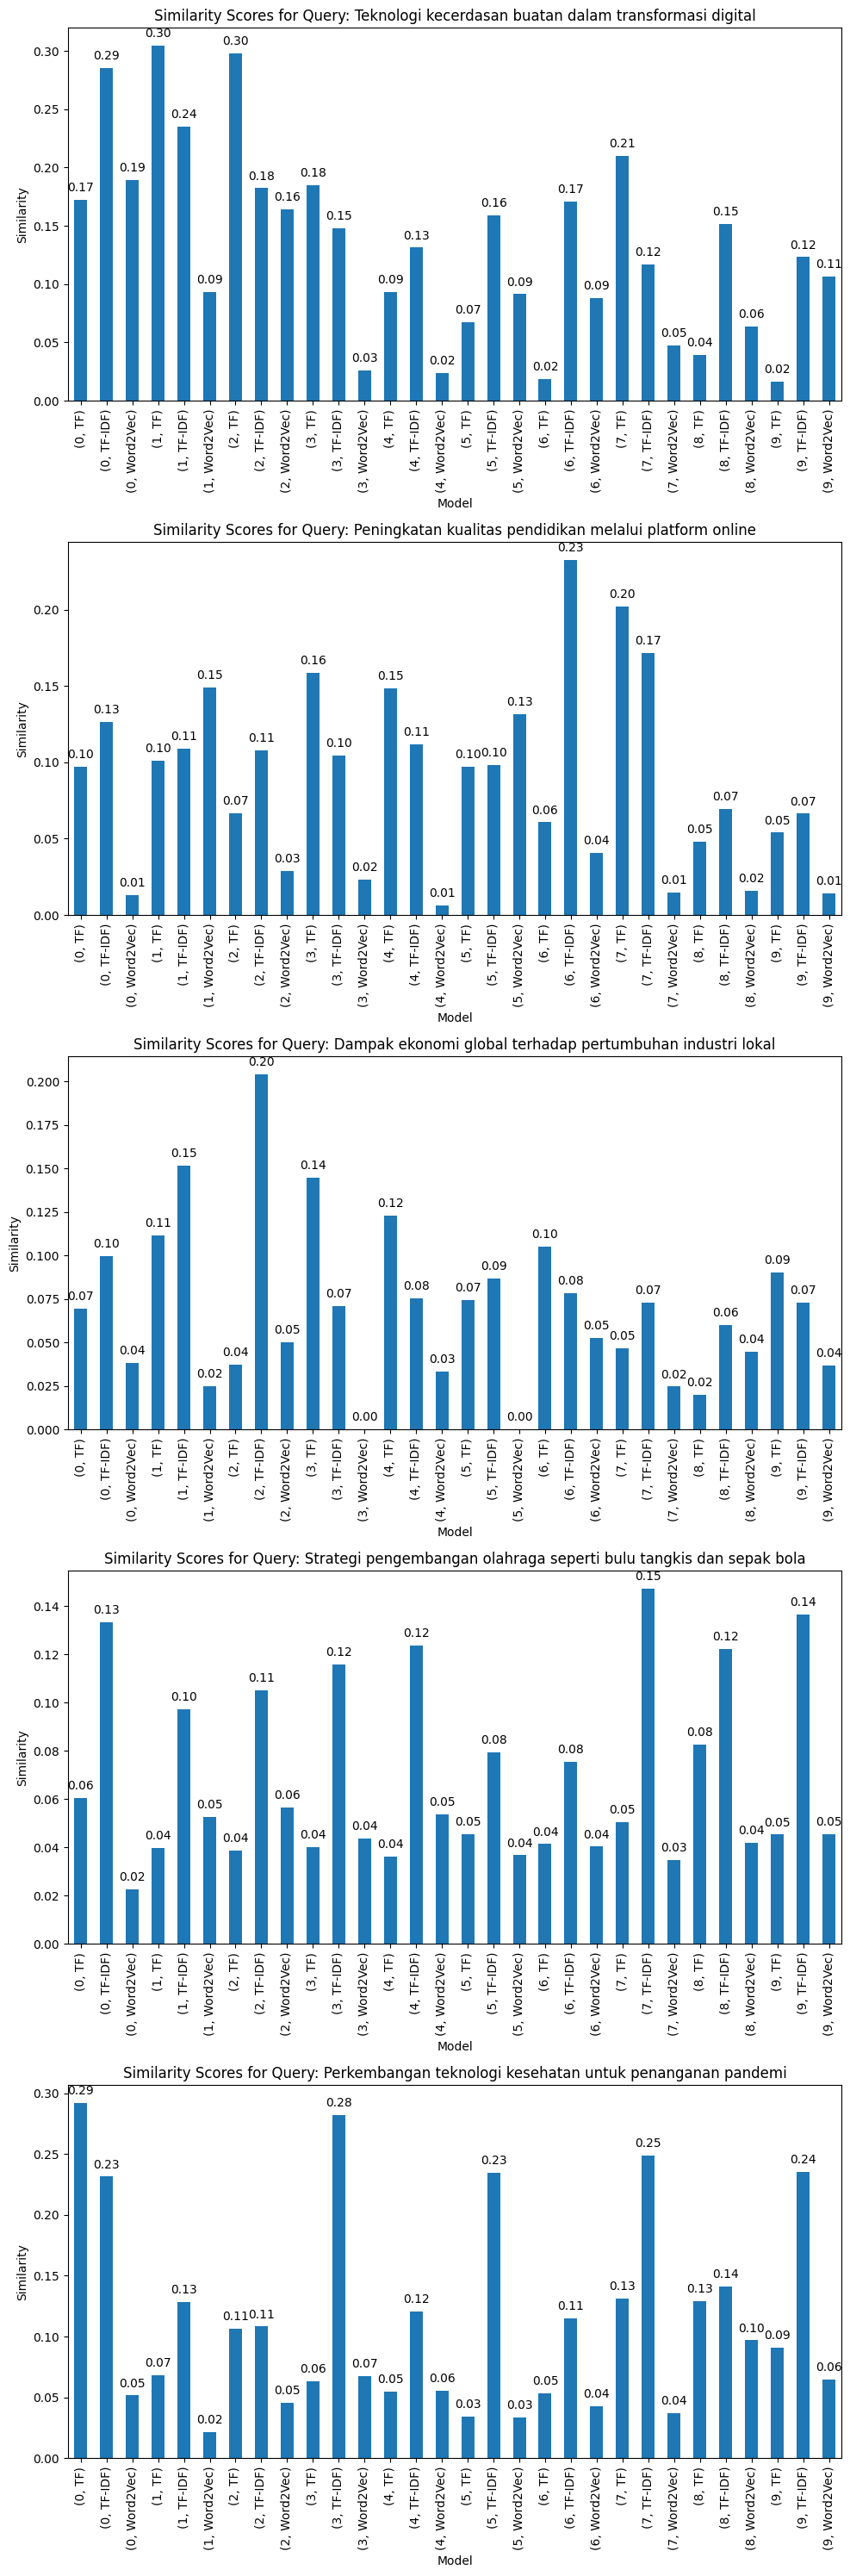

In [32]:
similarity_data = similarity_df.unstack(level=1)

fig, axes = plt.subplots(len(queries), 1, figsize=(10, 6 * len(queries)))

for i, query in enumerate(queries):
    similarity_data.loc[query].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Similarity Scores for Query: {query}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Similarity')

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

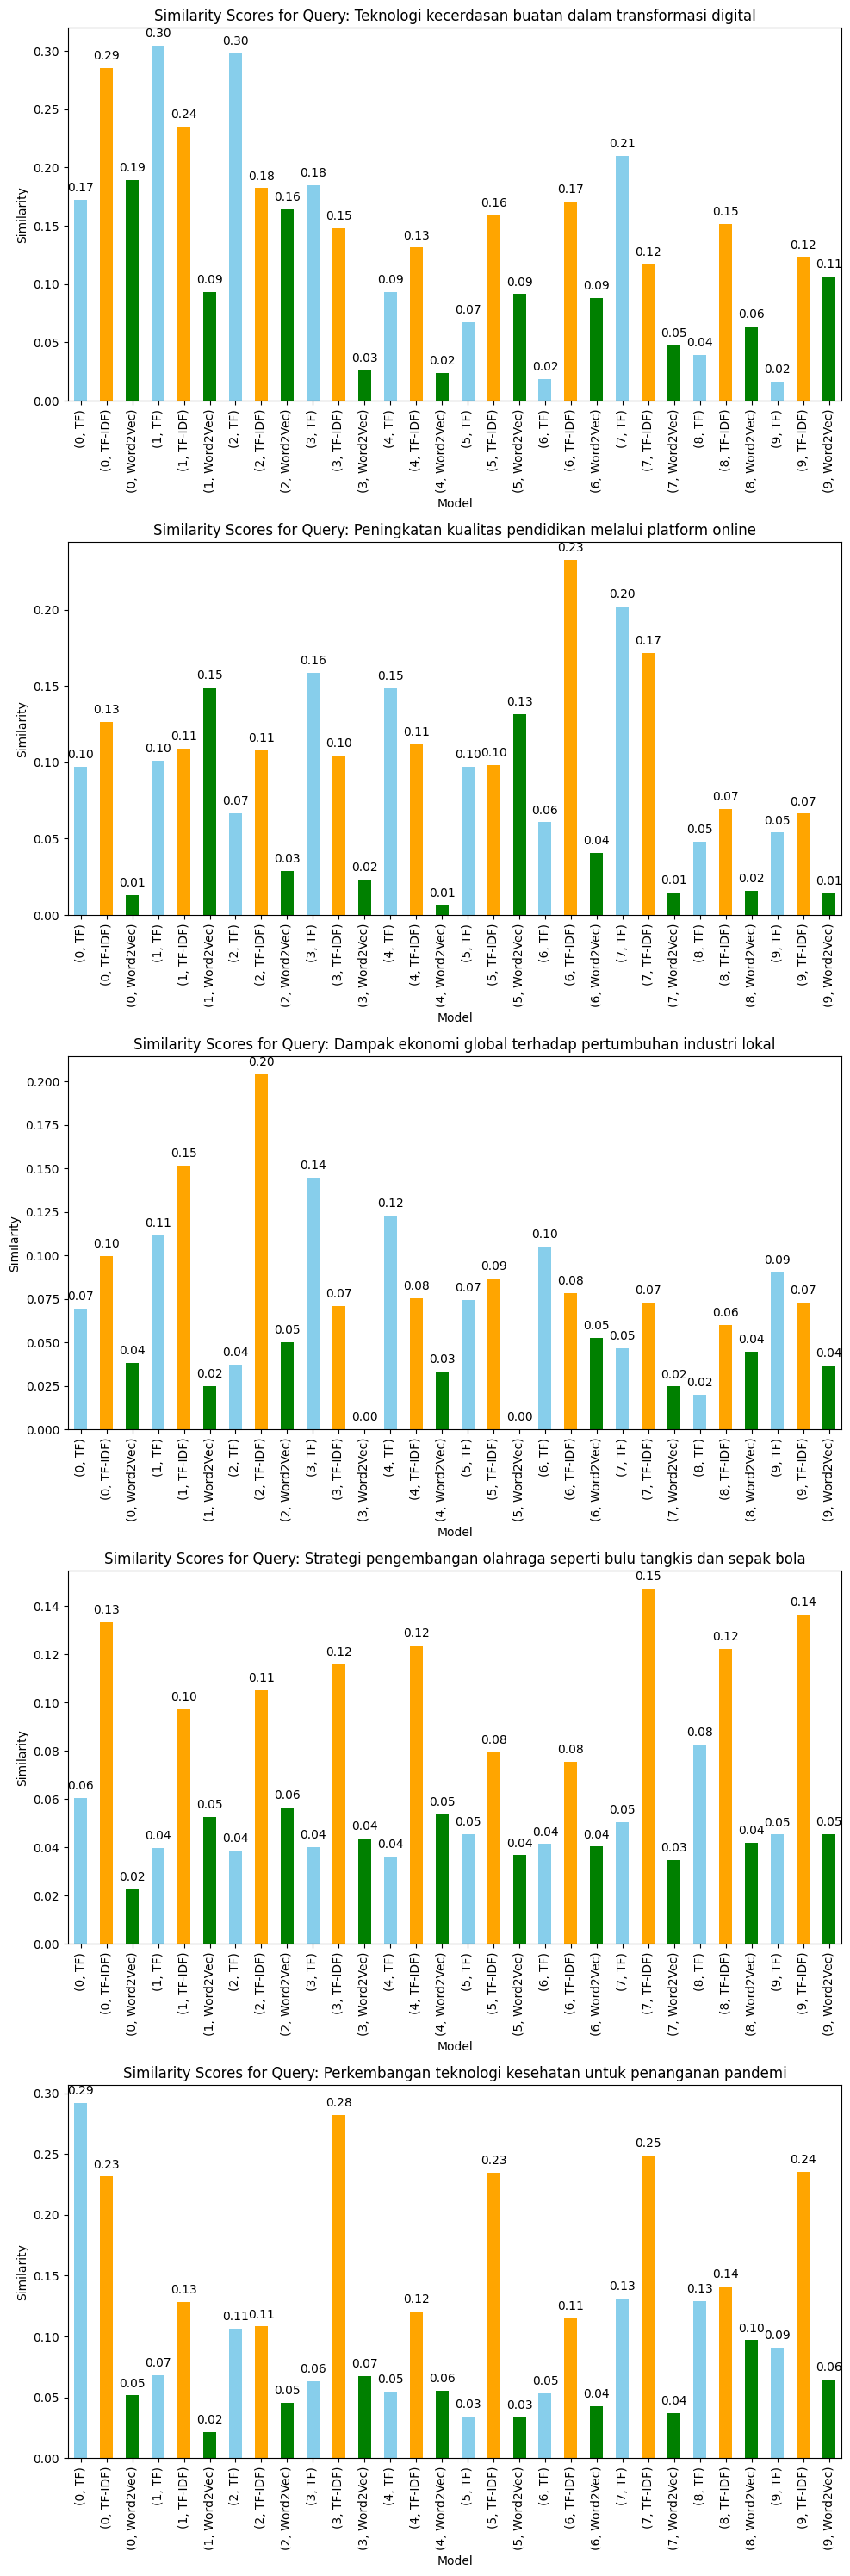

In [33]:
colors = ['skyblue', 'orange', 'green']

similarity_data = similarity_df.unstack(level=1)

fig, axes = plt.subplots(len(queries), 1, figsize=(10, 6 * len(queries)))

for i, query in enumerate(queries):
    similarity_data.loc[query].plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Similarity Scores for Query: {query}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Similarity')

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

## Comparison of Top 10 Documents from Each Query

In [42]:
for query in queries:
    print(f"\nQuery: {query}")

    comparison_data = {
        "Rank": list(range(1, 11)),
        "TF": [doc for doc in results_tf[query]],
        "TF-IDF": [doc for doc in results_tfidf[query]],
        "Word2Vec": [doc for doc in results_word2vec[query]],
    }

    comparison_df = pd.DataFrame(comparison_data)

    display(comparison_df)


Query: Teknologi kecerdasan buatan dalam transformasi digital


,Rank,TF,TF-IDF,Word2Vec
0,1,Teknologi adalah hal yang sangat dibutuhkan ...,Macam kecerdasan merupakan bentuk gambaran be...,Proses transformasi digital Indonesia harus d...
1,2,Macam kecerdasan merupakan bentuk gambaran be...,Proses transformasi digital Indonesia harus d...,Kemkominfo (Kementerian Komunikasi dan Informa...
2,3,Proses transformasi digital Indonesia harus d...,"Menteri Pendidikan, Kebudayaan, Riset, dan T...","Menteri Pendidikan, Kebudayaan, Riset, dan T..."
3,4,Menteri Koperasi dan Usaha Kecil dan Menenga...,Olimpiade Tokyo 2020 yang dimulai dengan perta...,Mobil klasik mewah tentu memiliki keistimewa...
4,5,Menteri Koordinator Perekonomian Airlangga H...,Teknologi adalah hal yang sangat dibutuhkan ...,Pengadilan Tata Usaha Negara (PTUN) Jakarta te...
5,6,Menteri Kesehatan Budi Gunadi Sadikin menyeb...,Menteri Koordinator Bidang Kemaritiman dan I...,"Gubernur Bank Indonesia, Perry Warjiyo menye..."
6,7,Ciri-Ciri demokrasi seharusnya merupakan hal...,BRI kembali meraih prestasi di kancah interna...,"Menteri Perdagangan, Muhammad Lutfi mempredi..."
7,8,BRI kembali meraih prestasi di kancah interna...,Tren digitalisasi kian tak terelakan. Hal ini ...,Menteri Koordinator Bidang Kemaritiman dan In...
8,9,Mantan Sekjen Demokrat Marzuki Alie menegask...,Menteri Koperasi dan Usaha Kecil dan Menenga...,Menteri Kesehatan Budi Gunadi Sadikin menyeb...
9,10,Keberadaan vaksin corona memberikan secercah...,PT Telkom Indonesia (Persero) Tbk (TLKM) teru...,Bank Indonesia (BI) berkomitmen kuat dalam m...



Query: Peningkatan kualitas pendidikan melalui platform online


,Rank,TF,TF-IDF,Word2Vec
0,1,Banyak cara wewujudkan rasa nasionalisme kau...,Menteri Keuangan Sri Mulyani Indrawati menga...,Keinginan platform penyedia layanan video str...
1,2,"Ketua Komisi XI DPR RI, Dito Ganinduto menga...",Anggota Komisi X DPR RI Fraksi Partai Gerind...,PT Hyundai Motors Indonesia (HMID) mempermudah...
2,3,Wakil Presiden Ma'ruf Amin menghadiri launch...,Menteri Pendidikan dan Kebudayaan (Mendikbud...,Berselancar di dunia internet memang mengasyi...
3,4,Pemerintah menerapkan PPKM Darurat Jawa-Bali...,"Menteri Pariwisata dan Ekonomi Kreatif, Sand...",Kementerian Komunikasi dan Informatika (Kemk...
4,5,Menteri Pendidikan dan Kebudayaan (Mendikbud...,Layanan kesehatan primer sebagai garda depan p...,Google akan mulai menerapkan perubahan yang me...
5,6,Kementerian Perencanaan Pembangunan Nasional...,Pemerintah JokowiMa'ruf masih memiliki sejum...,Pemerintah menerapkan PPKM Darurat Jawa-Bali...
6,7,Minat penjual untuk memanfaatkan platform di...,PT Hyundai Motors Indonesia (HMID) mempermudah...,Proses transformasi digital Indonesia harus d...
7,8,PT Hyundai Motors Indonesia (HMID) mempermudah...,"Wakil Gubernur DKI Jakarta, Ahmad Riza Patri...",Facebook melaporkan pendapatan perusahaan pa...
8,9,Ekspor dan impor Indonesia pada Juni 2021 me...,"Wakil Ketua Komisi X DPR RI, Abdul Fikri Faq...",Penerapan fitur App Tracking Transparency App...
9,10,Isu pendidikan ala militer masuk kampus buru...,Peneliti Center for Indonesian Policy Studie...,Apple dikabarkan telah menggulirkan macOS 12 M...



Query: Dampak ekonomi global terhadap pertumbuhan industri lokal


,Rank,TF,TF-IDF,Word2Vec
0,1,Wakil Presiden Ma'ruf Amin menghadiri launch...,Bank Indonesia (BI) memprediksi pertumbuhan ek...,Ekspor dan impor Indonesia pada Juni 2021 me...
1,2,Pandemi Covid-19 yang telah terjadi sejak ta...,International Monetary Fund (IMF) memprediks...,Bursa saham Asia Pasifik melemah pada perdagan...
2,3,Presiden keenam RI Susilo Bambang Yudhoyono ...,Deputi Gubernur Senior Bank Indonesia (BI) D...,Bursa saham Asia Pasifik melemah pada perdagan...
3,4,International Monetary Fund (IMF) memprediks...,Menteri Investasi Bahlil Lahadalia mengakui ...,Bursa saham Asia Pasifik menguat pada perdagan...
4,5,Indonesia dan Jepang terus meningkatkan kerj...,Terjadi peningkatan kasus Covid-19 di Indone...,PT Bahana TCW Investment Management (Bahana TC...
5,6,"Wakil Presiden Ma'ruf Amin menyebut, kehadir...",Pemerintah Jokowi memproyeksikan pertumbuhan...,Bursa saham Asia Pasifik turun pada perdaganga...
6,7,Badan Kebijakan Fiskal Kementerian Keuangan ...,Pertumbuhan ekonomi Indonesia diproyeksi melam...,"Co-founder Xiaomi Lei Jun mendonasikan USD 2,..."
7,8,Penerapan Pembatasan Kegiatan Masyarakat atau ...,Gubernur Bank Indonesia (BI) Perry Warjiyo men...,Bursa saham Asia Pasifik bervariasi pada perda...
8,9,"Bulan lalu, saat Israel membombardir Jalur G...","Menteri Keuangan, Sri Mulyani Indrawati memp...",Bursa saham Asia Pasifik melemah pada perdagan...
9,10,Pemerintah mencanangkan penciptaan kawasan eko...,Kapolri Jenderal Listyo Sigit Prabowo melalu...,Presiden Direktur PT Bank Central Asia (BCA)...



Query: Strategi pengembangan olahraga seperti bulu tangkis dan sepak bola


,Rank,TF,TF-IDF,Word2Vec
0,1,Presiden keenam RI Susilo Bambang Yudhoyono ...,Bulu Tangkis menjadi andalan Indonesia berburu...,Ketua Satuan Tugas (Satgas) Penanganan Covid...
1,2,Rambu-rambu larangan pengambilan gambar ditem...,Para atlet bulu tangkis Indonesia sebentar la...,"Menteri Keuangan, Sri Mulyani Indrawati meny..."
2,3,Nama bayi laki-laki Jawa Islam mengandung ma...,Tim bulu tangkis Indonesia tiba di Kampung Atl...,Menteri Pendidikan dan Kebudayaan (Mendikbud...
3,4,"Nama Taman Nasional (TN) Komodo, Manggarai B...",Atlet Indonesia yang meraih medali di Olimpiad...,Kementerian Pariwisata dan Ekonomi Kreatif m...
4,5,Keberadaan vaksin corona memberikan secercah...,Turnamen bulu tangkis bertajuk NKRI Cup Ontar...,Cara membentuk otot perut bisa mengurangi lem...
5,6,Badan Pemeriksa Keuangan (BPK) menemukan ada...,Manfaat minyak zaitun untuk bulu mata salah ...,Kabareskrim Polri Komjen Agus Andrianto mengin...
6,7,Dia naik ke tampuk kekuasaan seperti beberap...,Tim bulu tangkis Indonesia yang akan berlaga p...,Pemberlakuan pembatasan kegiatan masyarakat (...
7,8,Junta militer Myanmar menggunakan penyiksaan...,Pandemi Covid-19 yang telah terjadi sejak ta...,Korps Lalu Lintas (Korlantas) Polri menambah p...
8,9,"Pada 24 Mei di negara bagian Kachin, Myanmar...",Gelaran Euro 2020 / 2021 sudah mendekati part...,Kementerian Hukum dan Hak Asasi Manusia (Kemen...
9,10,Pemerintah resmi memperpanjang penerapan Pembe...,Olimpiade Tokyo 2020 yang dimulai dengan perta...,Pemerintah akan menerapkan kebijakan PPKM Da...



Query: Perkembangan teknologi kesehatan untuk penanganan pandemi


,Rank,TF,TF-IDF,Word2Vec
0,1,Teknologi adalah hal yang sangat dibutuhkan ...,Teknologi adalah hal yang sangat dibutuhkan ...,Menteri Kesehatan Budi Gunadi Sadikin menyatak...
1,2,Sejumlah imbauan dikeluarkan jelang Hari Raya ...,Tren digitalisasi kian tak terelakan. Hal ini ...,Teka-teki sayang soal cinta bisa Anda gunaka...
2,3,Pandemi Covid-19 menguras keuangan negara. B...,Presiden Joko Widodo atau Jokowi berpesan ke...,Presiden Joko Widodo mengatakan akan menamba...
3,4,Keberadaan vaksin corona memberikan secercah...,Kementerian Keuangan (Kemenkeu) kembali mena...,Menteri Koordinator Bidang Kemaritiman dan In...
4,5,Program Vaksinasi Gotong Royong (VGR) Individu...,Olimpiade Tokyo 2020 yang dimulai dengan perta...,Menteri Keuangan Sri Mulyani Indrawati melap...
5,6,"Bulan lalu, saat Israel membombardir Jalur G...",Ahli epidemiologi Fakultas Kesehatan Masyara...,Menteri Kesehatan Budi Gunadi Sadikin mengun...
6,7,Berdasarkan sebuah dokumen Kremlin yang boco...,IPTEK adalah istilah yang sering terdengar. B...,Untuk membuat sesi percintaan menjadi menari...
7,8,"Pada Maret 2020, Hannu Rajaniemi mengalihkan...","Kementerian Kesehatan menyatakan, tahun ini ...",Apotik hidup adalah sebuah kegiatan yang mem...
8,9,Hana Puspita hanya berbaring di dalam ambula...,Presiden Joko Widodo atau Jokowi meminta para...,Gubernur DKI Jakarta Anies Baswedan mengatur ...
9,10,Liputan6.com melakukan wawancara khusus dengan...,Ahli epidemiologi Fakultas Kesehatan Masyara...,Tenaga Ahli Utama Kantor Staf Kepresidenan (...


# Conclusion

1. Computation Time: Evaluasi waktu komputasi menunjukkan bahwa model TF adalah yang tercepat dengan waktu komputasi sebesar 6.50 detik, diikuti oleh TF-IDF dengan waktu 7.45 detik, dan terakhir Word2Vec dengan waktu komputasi paling lambat sebesar 16.17 detik. Kecepatan TF disebabkan oleh pendekatannya yang sederhana, hanya menghitung frekuensi kata tanpa perhitungan bobot tambahan. TF-IDF membutuhkan waktu sedikit lebih lama karena memperhitungkan bobot unik setiap term, sedangkan Word2Vec paling lambat karena melakukan perhitungan embedding semantik untuk setiap dokumen.

2. The Retrieved Documents (Relevance to Query): Evaluasi relevansi dokumen menunjukkan bahwa TF-IDF menghasilkan dokumen yang paling relevan dengan kueri. Model ini memanfaatkan bobot term yang unik, sehingga lebih baik dalam menangkap inti dari kueri. Word2Vec juga menghasilkan dokumen yang relevan secara semantik, tetapi konteksnya terkadang terlalu luas sehingga kurang spesifik terhadap kueri tertentu. TF, meskipun efisien, sering kali menghasilkan dokumen dengan relevansi rendah karena tidak mempertimbangkan bobot atau hubungan antar kata.

3. Comparison of Top 10 Documents from Each Query: Perbandingan 10 dokumen teratas untuk setiap kueri menunjukkan bahwa TF-IDF adalah model yang paling konsisten dalam menghasilkan dokumen yang relevan untuk berbagai jenis kueri. Word2Vec unggul dalam memahami hubungan semantik antar kata, tetapi sering menghasilkan dokumen dengan konteks yang lebih luas dan kurang spesifik. TF, di sisi lain, sering kali memberikan hasil dengan banyak noise karena hanya mengandalkan frekuensi kata tanpa mempertimbangkan keunikan atau relevansi istilah.

Secara keseluruhan, TF-IDF adalah model terbaik untuk tugas ini karena memberikan keseimbangan antara relevansi dokumen dan efisiensi waktu komputasi. Model ini cocok untuk kueri yang membutuhkan dokumen spesifik dan akurat. Word2Vec lebih cocok untuk analisis berbasis semantik yang mendalam tetapi memiliki kekurangan dalam konteks spesifik dan waktu komputasi yang lebih tinggi. Sementara itu, TF adalah pilihan yang baik jika efisiensi waktu menjadi prioritas utama, meskipun relevansi dokumennya cenderung rendah.